In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras
import pathlib

#/content/drive/MyDrive/AI Engineer Simplilearn Course/Deep Learning/boat_type_classification_dataset/buoy
#data_dir = tf.keras.utils.get_file('flower_photos', origin= dataset_url, untar = True)
data_dir = pathlib.Path("/content/drive/MyDrive/AI Engineer Simplilearn Course/Deep Learning/boat_type_classification_dataset")
print(data_dir)
image_count =  len(list(data_dir.glob('*/*.jpg')))
print(f'Total images - {image_count}')




/content/drive/MyDrive/AI Engineer Simplilearn Course/Deep Learning/boat_type_classification_dataset
Total images - 1162


In [ ]:
batch_size =  32
img_height =  180
img_width = 180

train_ds =  tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split =0.2,
    subset = 'training',
    seed = 43,
    shuffle=True,
    image_size= (img_height, img_width),
    batch_size =32
)


val_ds =  tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split =0.2,
    subset = 'validation',
    seed = 43,
    shuffle=True,
    image_size= (img_height, img_width),
    batch_size =32
)


# Check the structure of the datasets
for images, labels in train_ds.take(1):  # Take one batch of data
    print("Image batch shape:", images.shape)  # Should print (batch_size, img_height, img_width, 3)
    print("Label batch shape:", labels.shape)  # Should print (batch_size,)
    print("Labels:", labels.numpy())  # Print the first batch of labels (should be integers)

# Similarly for validation dataset
for images, labels in val_ds.take(1):
    print("Image batch shape:", images.shape)  # Should print (batch_size, img_height, img_width, 3)
    print("Label batch shape:", labels.shape)  # Should print (batch_size,)
    print("Labels:", labels.numpy())  # Should print the first batch of labels (should be integers)

Found 1162 files belonging to 9 classes.
Using 930 files for training.
Found 1162 files belonging to 9 classes.
Using 232 files for validation.
Image batch shape: (32, 180, 180, 3)
Label batch shape: (32,)
Labels: [1 6 6 6 6 1 4 4 8 4 2 4 1 1 8 1 1 4 8 4 8 6 6 6 0 4 8 4 1 1 6 4]
Image batch shape: (32, 180, 180, 3)
Label batch shape: (32,)
Labels: [2 8 6 8 6 8 8 8 8 8 8 6 1 8 6 1 4 2 8 3 4 6 0 8 6 2 8 1 7 1 6 6]


In [ ]:
class_names = train_ds.class_names
print(f'Class names {class_names}')

Class names ['buoy', 'cruise_ship', 'ferry_boat', 'freight_boat', 'gondola', 'inflatable_boat', 'kayak', 'paper_boat', 'sailboat']


tf.Tensor([7 8 6 6 1 0 6 8 6 6 2 8 6 6 8 8 8 6 8 6 4 8 6 7 6 1 8 8 1 4 8 8], shape=(32,), dtype=int32)


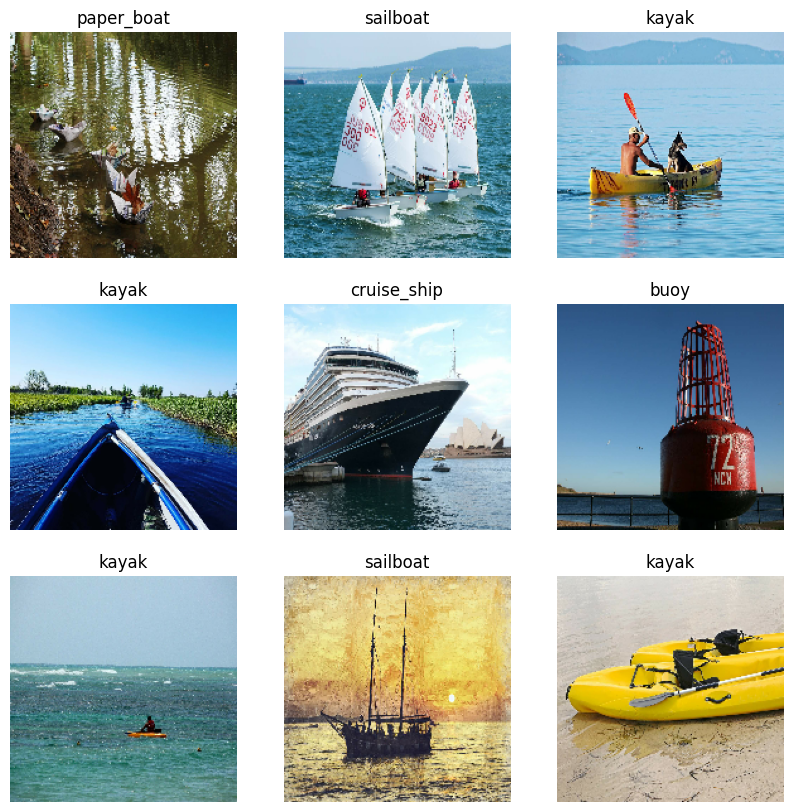

In [ ]:
plt.figure(figsize = (10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax =  plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')
print(labels)

plt.show()

In [ ]:
# Configure the dataset for performance

AUTOTUNE = tf.data.AUTOTUNE
train_ds_nm = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds_nm = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
normalization_layer = layers.Rescaling(1./255)

normalization_layer = keras.layers.Rescaling(1./255)
normalized_train_ds_nm = train_ds_nm.map(lambda x, y: (normalization_layer(x), y))
normalized_val_ds_nm = val_ds_nm.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_train_ds_nm))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))
print(labels_batch)


0.0 1.0
tf.Tensor([3 1 1 8 7 3 8 8 8 8 1 2 1 4 6 6 8 0 8 2 1 6 6 4 8 4 4 6 1 1 1 8], shape=(32,), dtype=int32)


In [ ]:



# Data Augmentation

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)


num_classes = len(class_names)
model = Sequential([
  data_augmentation,
  layers.Conv2D(32, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.GlobalAveragePooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(), # Add this line to flatten the output
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(class_names), activation='softmax'),
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 32)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,041 (125.16 KB)

 Trainable params: 32,041 (125.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs=20
# Check a batch of predictions
for images, labels in train_ds.take(1):
    predictions = model(images)  # Get model predictions
    # print("Predictions shape:", predictions.shape)  # Should be (32, 9) for 32 samples, 9 classes
    # print("Predictions:", predictions.numpy())
history =  model.fit(normalized_train_ds_nm, validation_data =normalized_val_ds_nm, epochs= epochs )

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 96s 3s/step - accuracy: 0.2976 - loss: 2.0276 - val_accuracy: 0.3017 - val_loss: 1.8241
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.3310 - loss: 1.8422 - val_accuracy: 0.3017 - val_loss: 1.8079
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.3313 - loss: 1.8118 - val_accuracy: 0.3017 - val_loss: 1.8018
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.3593 - loss: 1.7920 - val_accuracy: 0.3017 - val_loss: 1.8193
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.3448 - loss: 1.8340 - val_accuracy: 0.3017 - val_loss: 1.7876
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.3626 - loss: 1.7882 - val_accuracy: 0.3017 - val_loss: 1.7716
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.3222 - loss: 1.7920 - val_accuracy: 0.3017 - val_loss: 1.7611
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.3684 - loss: 1.7361 - val_accuracy: 0.3060 - val_loss

In [ ]:
import pandas as pd

In [ ]:
hist = pd.DataFrame(history.history)

In [ ]:
hist

,accuracy,loss,val_accuracy,val_loss
0,0.334409,1.912697,0.301724,1.824062
1,0.343011,1.834764,0.301724,1.807899
2,0.343011,1.812622,0.301724,1.801820
3,0.343011,1.811024,0.301724,1.819282
4,0.343011,1.810669,0.301724,1.787600
5,0.343011,1.803809,0.301724,1.771576
6,0.343011,1.778467,0.301724,1.761072
7,0.353763,1.758960,0.306034,1.739011
8,0.356989,1.742286,0.318966,1.740908
9,0.355914,1.741923,0.331897,1.732368


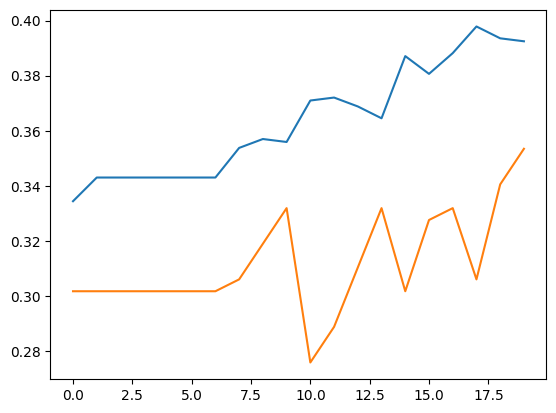

In [ ]:
plt.plot(hist.index ,hist['accuracy'])
plt.plot(hist.index ,hist['val_accuracy'])
plt.show()

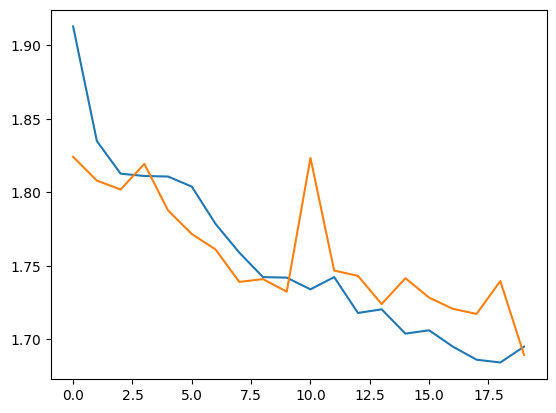

In [ ]:
plt.plot(hist.index ,hist['loss'])
plt.plot(hist.index ,hist['val_loss'])
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf

# Assuming your model is already trained and named `model`

# Step 1: Load the image and preprocess it
img_path = '/content/drive/MyDrive/AI Engineer Simplilearn Course/Deep Learning/sailboat-test-case.jpg'  # Replace with the path to your image

# Load the image, resize it to the target size (e.g., 180x180)
img = image.load_img(img_path, target_size=(180, 180))

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Rescale the image (if you used Rescaling(1./255) during model training)
img_array = img_array / 255.0  # Or use your normalization layer if it was different

# Expand dimensions to simulate batch size (e.g., shape becomes (1, 180, 180, 3))
img_array = np.expand_dims(img_array, axis=0)

# Step 2: Use the model to make a prediction
predictions = model.predict(img_array)

# Step 3: Interpret the predictions
# Since it's a classification task, you typically want the class with the highest probability
predicted_class = np.argmax(predictions, axis=1)

# Display the predicted class
print(f"Predicted class: {class_names[predicted_class[0]]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
Predicted class: sailboat


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf

# Assuming your model is already trained and named `model`

# Step 1: Load the image and preprocess it
img_path_2 = '/content/drive/MyDrive/AI Engineer Simplilearn Course/Deep Learning/cruise-ship-test-case-2.jpg'  # Replace with the path to your image

# Load the image, resize it to the target size (e.g., 180x180)
img_2 = image.load_img(img_path_2, target_size=(180, 180))

# Convert the image to a numpy array
img_array_2 = image.img_to_array(img_2)

# Rescale the image (if you used Rescaling(1./255) during model training)
img_array_2 = img_array_2 / 255.0  # Or use your normalization layer if it was different

# Expand dimensions to simulate batch size (e.g., shape becomes (1, 180, 180, 3))
img_array_2 = np.expand_dims(img_array_2, axis=0)

# Step 2: Use the model to make a prediction
predictions_2 = model.predict(img_array_2)

# Step 3: Interpret the predictions
# Since it's a classification task, you typically want the class with the highest probability
predicted_class_2 = np.argmax(predictions_2, axis=1)

# Display the predicted class
print(f"Predicted class: {class_names[predicted_class_2[0]]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Predicted class: sailboat


8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 715ms/step


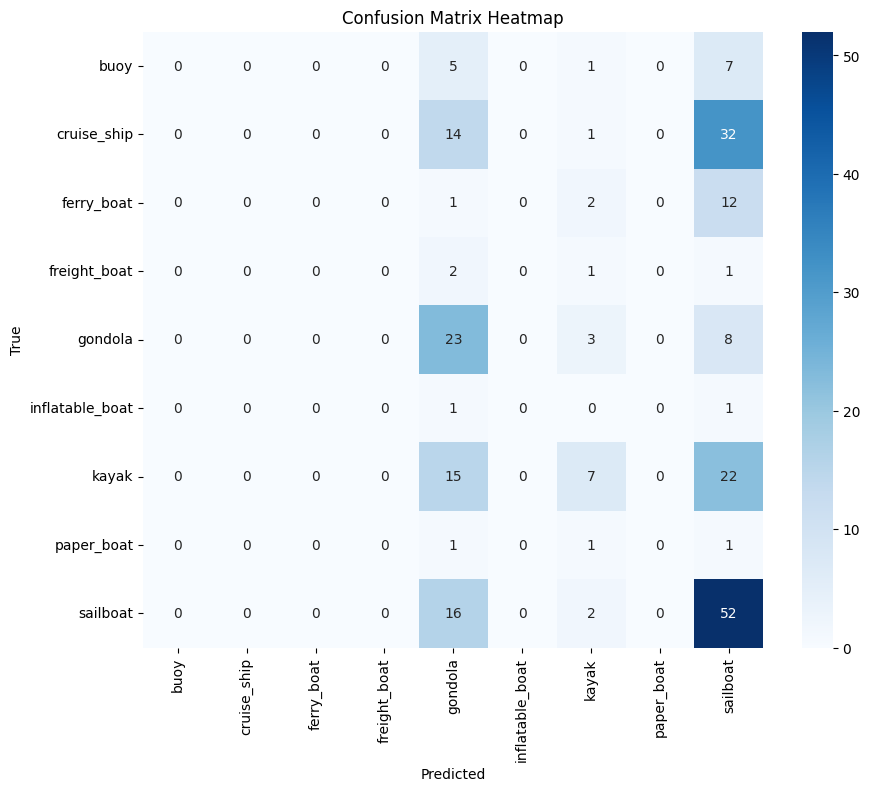

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Make predictions on the validation set (or any dataset)
predictions = model.predict(normalized_val_ds_nm)  # or use test data if applicable
predicted_classes = np.argmax(predictions, axis=1)  # Get the predicted class labels
true_classes = np.concatenate([y for x, y in normalized_val_ds_nm], axis=0)  # True labels from validation dataset

# Step 2: Calculate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Step 3: Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

mobile_net_train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset='training',
    seed=1,
    image_size=(224, 224),
    batch_size=batch_size
)

mobile_net_val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset='validation',
    seed=1,
    image_size=(224, 224),
    batch_size=batch_size
)

Found 1162 files belonging to 9 classes.
Using 814 files for training.
Found 1162 files belonging to 9 classes.
Using 348 files for validation.


In [ ]:


# Check the structure of the datasets
for images, labels in mobile_net_train_ds.take(1):  # Take one batch of data
    print("Image batch shape:", images.shape)  # Should print (batch_size, img_height, img_width, 3)
    print("Label batch shape:", labels.shape)  # Should print (batch_size,)
    print("Labels:", labels.numpy())  # Print the first batch of labels (should be integers)

# Similarly for validation dataset
for images, labels in mobile_net_val_ds.take(1):
    print("Image batch shape:", images.shape)  # Should print (batch_size, img_height, img_width, 3)
    print("Label batch shape:", labels.shape)  # Should print (batch_size,)
    print("Labels:", labels.numpy())  # Should print the first batch of labels (should be integers)



class_names = train_ds.class_names
print(f'Class names {class_names}')
class_names = mobile_net_train_ds.class_names
print(f'Class names {class_names}')

Image batch shape: (32, 224, 224, 3)
Label batch shape: (32,)
Labels: [8 1 6 1 1 1 4 4 6 1 8 6 3 4 2 6 2 8 4 6 6 4 1 1 4 8 5 1 6 6 8 8]
Image batch shape: (32, 224, 224, 3)
Label batch shape: (32,)
Labels: [6 6 1 6 4 3 4 6 0 8 8 8 4 2 8 6 1 6 1 8 8 8 8 4 8 8 0 1 4 6 1 8]
Class names ['buoy', 'cruise_ship', 'ferry_boat', 'freight_boat', 'gondola', 'inflatable_boat', 'kayak', 'paper_boat', 'sailboat']
Class names ['buoy', 'cruise_ship', 'ferry_boat', 'freight_boat', 'gondola', 'inflatable_boat', 'kayak', 'paper_boat', 'sailboat']


In [ ]:
# Normalize the data?



from tensorflow.keras import layers
from tensorflow.keras.models import Sequential



AUTOTUNE = tf.data.AUTOTUNE
mobile_net_train_ds_nm = mobile_net_train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
mobile_net_val_ds_nm = mobile_net_val_ds.cache().prefetch(buffer_size=AUTOTUNE)



mobile_net_normalization_layer = keras.layers.Rescaling(1./255)
mobile_net_normalized_train_ds_nm = mobile_net_train_ds.map(lambda x, y: (mobile_net_normalization_layer(x), y))
mobile_net_normalized_val_ds_nm = mobile_net_val_ds.map(lambda x, y: (mobile_net_normalization_layer(x), y))
mobile_net_image_batch, mobile_net_labels_batch = next(iter(mobile_net_normalized_train_ds_nm))
mobile_net_first_image = mobile_net_image_batch[0]
print(np.min(mobile_net_first_image), np.max(mobile_net_first_image))
print(mobile_net_labels_batch)



0.0 0.9998469
tf.Tensor([1 6 4 1 8 6 6 1 6 7 7 8 3 6 6 1 0 6 8 3 4 4 8 4 8 8 8 1 5 8 8 8], shape=(32,), dtype=int32)


In [ ]:

from tensorflow.keras.callbacks import EarlyStopping


# 1. Load MobileNetV2 pre-trained model without top layers (no final classification layers)
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
mobile_net_img_height, mobile_net_img_width = 224, 224  # MobileNetV2 typically uses 224x224

# 2. Freeze the base model
base_model.trainable = False



# 3. Create a custom head for the classification task
model = models.Sequential([
    base_model,  # Add MobileNetV2 as the feature extractor
    layers.GlobalAveragePooling2D(),  # Pool the feature maps into a single vector
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),  # Fully connected layer
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),  # Fully connected layer
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(9, activation='softmax')  # Output layer (9 classes in this case)
])

# 4. Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse_categorical_crossentropy for integer labels
              metrics=['accuracy'])


model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,621,513 (10.00 MB)

 Trainable params: 362,761 (1.38 MB)

 Non-trainable params: 2,258,752 (8.62 MB)

In [ ]:

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,  # Stop after 3 epochs with no improvement
    verbose=1,  # Print messages when early stopping occurs
    restore_best_weights=True  # Restore weights from the epoch with the best performance
)


from sklearn.utils.class_weight import compute_class_weight

# Compute class weights based on the class distribution
class_weights = compute_class_weight('balanced', classes=np.unique(mobile_net_train_ds.class_names), y=mobile_net_train_ds.class_names)

# Convert the array to a dictionary
class_weight_dict = dict(enumerate(class_weights))

# Train the model with class weights
history = model.fit(
    mobile_net_normalized_train_ds_nm,
    validation_data=mobile_net_normalized_val_ds_nm,
    epochs=50,
    class_weight=class_weight_dict,
    callbacks=[early_stopping]  # Add the early stopping callback
)

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.9693 - loss: 0.1055 - val_accuracy: 0.8678 - val_loss: 0.5332
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.9810 - loss: 0.0834 - val_accuracy: 0.8707 - val_loss: 0.5444
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.9763 - loss: 0.0840 - val_accuracy: 0.8649 - val_loss: 0.5937
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.9900 - loss: 0.0614 - val_accuracy: 0.8477 - val_loss: 0.5668
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 1.


Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.3731 - loss: 2.4326 - val_accuracy: 0.3017 - val_loss: 3.2371
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.7038 - loss: 1.0089 - val_accuracy: 0.2974 - val_loss: 3.1570
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.7732 - loss: 0.7422 - val_accuracy: 0.3103 - val_loss: 3.8178
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.8184 - loss: 0.5814 - val_accuracy: 0.2716 - val_loss: 3.6108
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8162 - loss: 0.5668 - val_accuracy: 0.2241 - val_loss: 3.7353


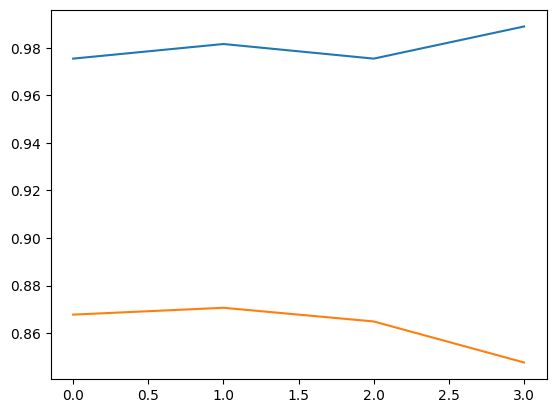

In [ ]:
import pandas as pd
mobile_net_hist = pd.DataFrame(history.history)

plt.plot(mobile_net_hist.index, mobile_net_hist['accuracy'])
plt.plot(mobile_net_hist.index, mobile_net_hist['val_accuracy'])
plt.show()

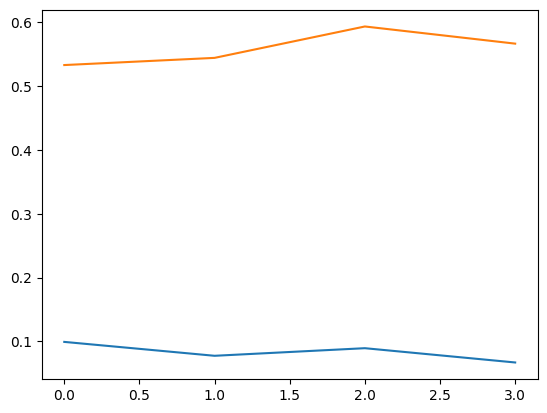

In [ ]:
plt.plot(mobile_net_hist.index, mobile_net_hist['loss']) # blue
plt.plot(mobile_net_hist.index, mobile_net_hist['val_loss']) # orange
plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step


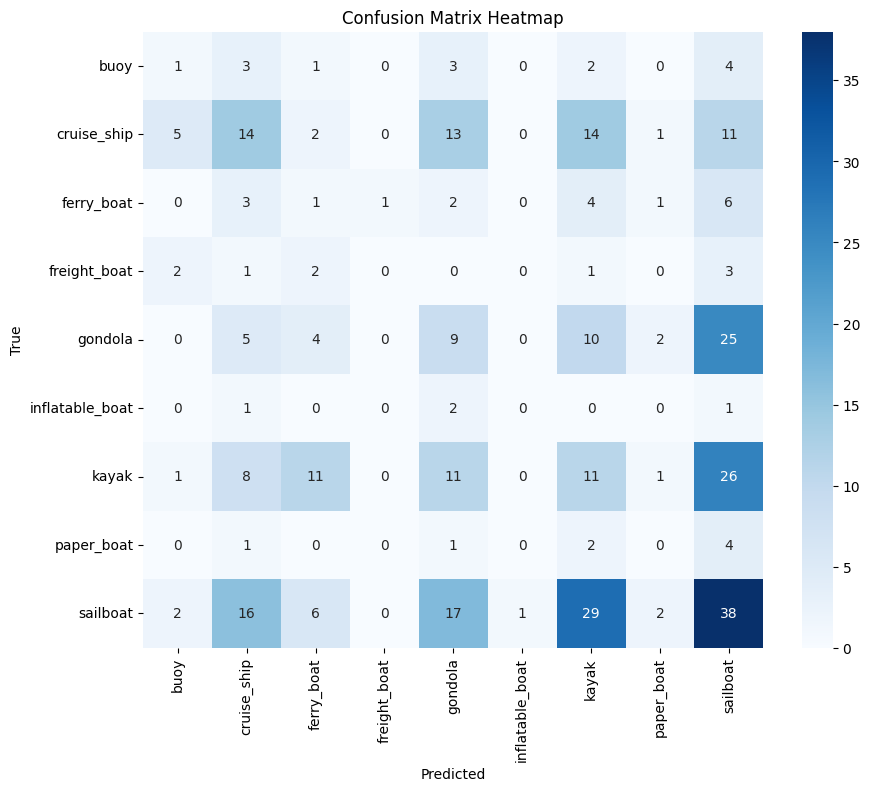

Classification Report:
                 precision    recall  f1-score   support

           buoy       0.09      0.07      0.08        14
    cruise_ship       0.27      0.23      0.25        60
     ferry_boat       0.04      0.06      0.04        18
   freight_boat       0.00      0.00      0.00         9
        gondola       0.16      0.16      0.16        55
inflatable_boat       0.00      0.00      0.00         4
          kayak       0.15      0.16      0.15        69
     paper_boat       0.00      0.00      0.00         8
       sailboat       0.32      0.34      0.33       111

       accuracy                           0.21       348
      macro avg       0.11      0.11      0.11       348
   weighted avg       0.21      0.21      0.21       348



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Make predictions on the validation set (or any dataset)
mobile_net_predictions = model.predict(mobile_net_normalized_val_ds_nm)  # or use test data if applicable
mobile_net_predicted_classes = np.argmax(mobile_net_predictions, axis=1)  # Get the predicted class labels
mobile_net_true_classes = np.concatenate([y for x, y in mobile_net_normalized_val_ds_nm], axis=0)  # True labels from validation dataset

# Step 2: Calculate the confusion matrix
mobile_net_cm = confusion_matrix(mobile_net_true_classes, mobile_net_predicted_classes)

# Step 3: Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(mobile_net_cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Optional: Print Classification Report
print("Classification Report:")
print(classification_report(mobile_net_true_classes, mobile_net_predicted_classes, target_names=class_names))

In [ ]:
# TODO: We're really biased towards labeling things as sailboats! Maybe we need more data? different model or model config